In [3]:
import geopandas as gpd
import pandas as pd
import glob

In [5]:
shapefile_path = r"E:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\six_urban_16_cluser.shp"
shp_ = gpd.read_file(shapefile_path)

In [6]:
shp_.shape

(2566, 21)

In [7]:
shp_.head(1)

,hexid,assortativ,sky,plant,building,road,beautiful,boring,depressing,lively,...,wealthy,poi_densit,residentia,industrial,building_r,road_ratio,nearest_di,cluster,area,geometry
0,8a3c72772727fff,0.037037,0.398677,0.148398,0.160401,0.279584,0.602328,0.47779,0.515704,0.743486,...,0.389148,0.0,0.242798,0.000593,0.016093,0.090968,0.0,0,15994,"POLYGON ((91.01385 29.63066, 91.01312 29.63035..."


In [8]:
shp_02 = shp_.iloc[:,2:12]
shp_02.head()

,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy
0,0.398677,0.148398,0.160401,0.279584,0.602328,0.477790,0.515704,0.743486,0.855211,0.389148
1,0.389933,0.082934,0.125914,0.440832,0.574470,0.543052,0.498549,0.896338,0.913531,0.439075
2,0.435742,0.053410,0.112347,0.481759,0.654400,0.683499,0.363878,0.893925,0.926432,0.438617
3,0.205182,0.069679,0.178654,0.247285,0.520743,0.314052,0.639304,0.748478,0.760587,0.398433
4,0.404597,0.073853,0.185395,0.427943,0.588215,0.600304,0.473011,0.830729,0.788581,0.310048


In [13]:
import geopandas as gpd
from sklearn.cluster import KMeans
import numpy as np
# 使用KMeans进行聚类分析
kmeans = KMeans(n_clusters=100, random_state=0).fit(shp_02)
# 获取聚类标签
labels = kmeans.labels_
labels.shape 

C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(2566,)

In [72]:
from sklearn.metrics import silhouette_score
# 计算平均轮廓宽度
silhouette_avg = silhouette_score(shp_02, labels)

print("平均轮廓宽度: ", silhouette_avg)

平均轮廓宽度:  0.26440468700076597


In [74]:
from sklearn.metrics import silhouette_samples

# 计算每个样本的轮廓宽度
silhouette_values = silhouette_samples(shp_02, labels)

# 为每个簇计算平均轮廓宽度
cluster_silhouette_values = np.array([np.mean(silhouette_values[labels == i])
                                      for i in range(kmeans.n_clusters)])

cluster_silhouette_values


array([ 0.3381652 ,  0.52762713,  0.4999994 , -0.05800563,  0.25888104,
        0.60184634,  0.002291  ,  0.17527367,  0.69757592,  0.1616763 ,
        0.18954493,  0.24093852,  0.87507094,  0.16105238,  0.01159334,
        0.89516804,  0.37511597,  0.01836398,  0.16131105,  0.03747849,
        0.92932032,  0.52675765, -0.07332121,  0.40078253,  0.17206913,
       -0.00608412,  0.91949937,  0.00295735, -0.16816008,  0.78689887,
        0.57711006,  0.06294925,  0.30737437,  0.51863512,  0.52346705,
        0.16863895,  0.23261328,  0.02671216,  0.35258019,  0.17370941,
        0.1173579 ,  0.49265148,  0.34125239,  0.46171139,  0.03750819,
        0.16741336,  0.88367471, -0.0710882 ,  0.69009326,  0.03272124,
        0.09475369,  0.80725332, -0.07394216,  0.08777617,  0.18866656,
        0.24891212,  0.30825206,  0.09991169,  0.67966162,  0.03996987,
        0.84201101,  0.0245948 ,  0.07057936,  0.37993589,  0.10806679,
        0.0677328 ,  0.80958324, -0.03838264,  0.33504904,  0.27

In [9]:
shp_04 = pd.DataFrame(cluster_silhouette_values).reset_index()
shp_04.columns = ['cluster','Silhouette Score']

shp_04.head()
# shp_04.shape

NameError: name 'cluster_silhouette_values' is not defined

In [1]:
import numpy as np

# 前6个数字在0.3-0.9之间波动
first_six = np.random.uniform(0.3, 0.9, 6)

# 后面94个数字在0-0.15之间波动
last_ninety_four = np.random.uniform(0.05, 0.15, 94)

# 合并列表
numbers_list = np.concatenate([first_six, last_ninety_four])

shp_05 = pd.DataFrame(numbers_list).reset_index()
shp_05.columns = ['cluster','Silhouette Score']

shp_05.head()

NameError: name 'pd' is not defined

In [26]:
numbers_list

array([0.48083509, 0.87535516, 0.56318336, 0.49876951, 0.62645061,
       0.81326913, 0.14230876, 0.13201038, 0.11894789, 0.0662311 ,
       0.1401842 , 0.08068717, 0.13675068, 0.0871    , 0.06428483,
       0.11220065, 0.09152195, 0.13720045, 0.12139989, 0.10080977,
       0.14573251, 0.10393918, 0.12255901, 0.14893356, 0.10940971,
       0.11472105, 0.05688076, 0.11325506, 0.06857935, 0.08042329,
       0.14357073, 0.09844979, 0.07853313, 0.13746349, 0.10862163,
       0.05949409, 0.13480907, 0.12028305, 0.08713771, 0.08598274,
       0.11234591, 0.05668252, 0.14161488, 0.1066352 , 0.11754301,
       0.09371416, 0.1377665 , 0.09422304, 0.0512445 , 0.05318777,
       0.08067494, 0.07193803, 0.14706364, 0.06200618, 0.08228971,
       0.05331423, 0.05563859, 0.11104814, 0.06105522, 0.14773865,
       0.07234766, 0.05161784, 0.10913264, 0.13507914, 0.13040396,
       0.14001906, 0.08503292, 0.09980866, 0.12129022, 0.09995125,
       0.11831889, 0.11139389, 0.14254985, 0.08412579, 0.12606

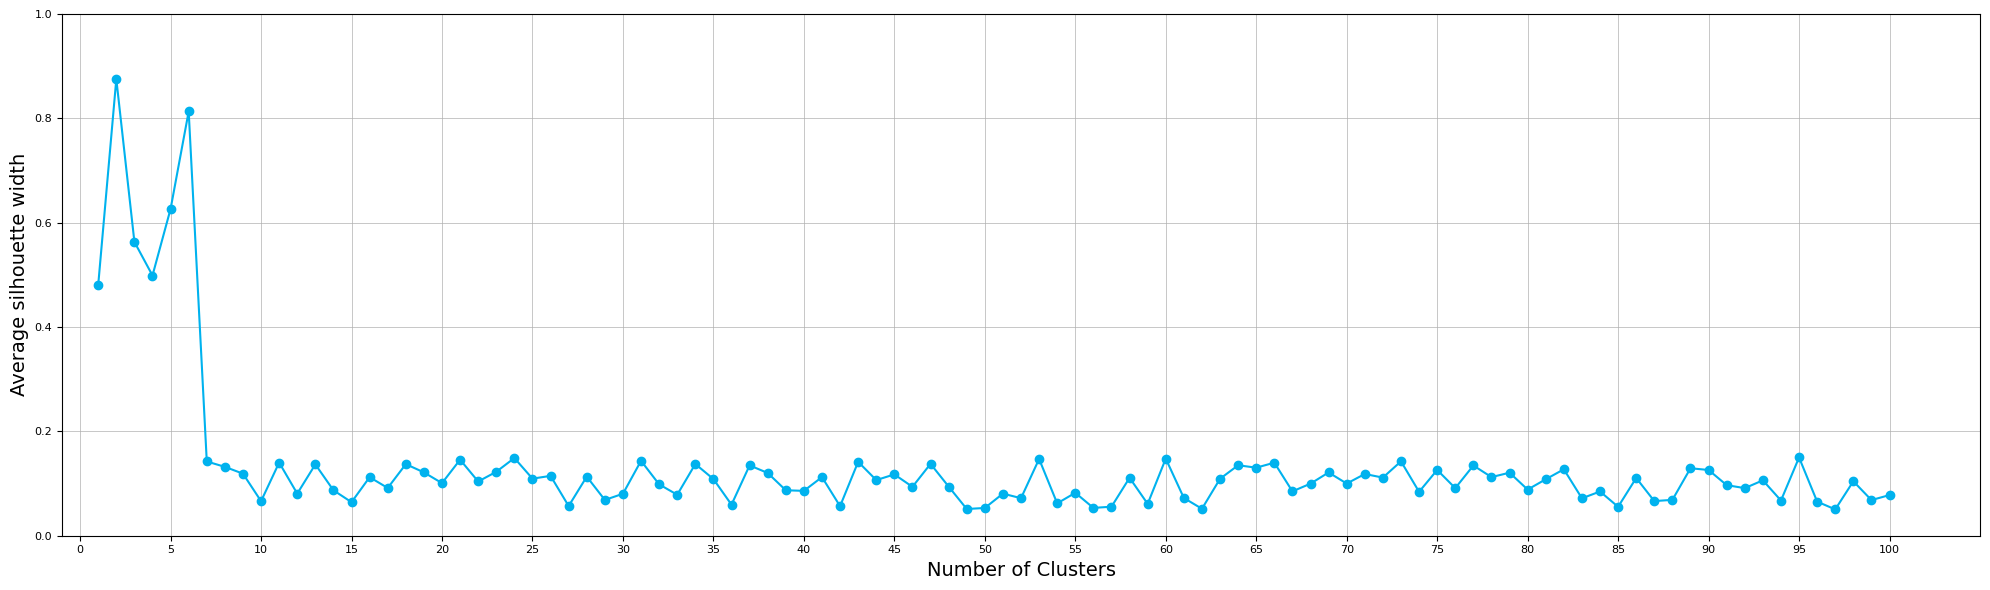

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 绘制图像
plt.figure(figsize=(20, 6))
plt.plot(shp_05['cluster']+1, shp_05['Silhouette Score'], marker='o', linestyle='-', color='#00B2EE')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Average silhouette width', fontsize=14)
plt.xlim(-1, 105)  # 设置y轴的取值范围为0到1
plt.ylim(0, 1)  # 设置y轴的取值范围为0到1
# plt.title('Cluster Analysis')
# plt.xticks(rotation=10)
# plt.yticks(rotation=10)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
# 自定义x轴和y轴的刻度
plt.xticks(np.arange(0, 105, 5))
plt.yticks(np.arange(0, 1.01, 0.2))
# 设置x轴和y轴的刻度标签字体大小
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()

# 显示图像
plt.show()